# Introduction
In the following analysis, we will talk about how one can create an NLP to detect whether the news is real or fake. Nowadays, fake news has become a common trend. Even trusted media houses are known to spread fake news and are losing their credibility. So, how can we trust any news to be real or fake?

# Dataset
1) train.csv: A full training dataset with the following attributes:  
2) id: unique id for a news article  
3) title: the title of a news article  
4) author: author of the news article  
5) text: the text of the article; could be incomplete  
6) label: a label that marks the article as potentially unreliable. Where 1: unreliable and 0: reliable.  

# Contents
1) Introduction  
2) Dataset  
3) Importing important libraries  
4) Reading dataset  
5) Data Pre-Processing  
6) Building model  
7) Spiliting and Training  
8) Submission file  
9) Conclusion  

# Importing important libraries

In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [18]:
# Google Drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Colab Notebooks/project/'

Train = pd.read_csv(path+"train.csv")

# Windows Offline
# Train = pd.read_csv("C:\\Users\\walee\\Google Drive\\sp18-bcs-170\\Colab Notebooks\\project\\train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# here we are printing first five lines of our train dataset
Train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Pre-Processing

In [20]:
# here we are Getting the Independent Features
X=Train.drop('label',axis=1)

# printing head of our independent features
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [21]:
# here we are printing shape of our dataset
Train.shape

(20800, 5)

In [22]:
# here we are checking if there is null value or not
Train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [23]:
# here we are droping NaN values from our dataset
Train=Train.dropna()

In [24]:
# here we are checking again if there is any NaN value or not
Train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [25]:
Train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [26]:
# here we are copying our dataset .
Train=Train.copy()

# here we are reseting our index
Train.reset_index(inplace=True)

# here we are printing our first 10 line of dataset for checking indexing
Train.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [27]:
x=Train['title']
# here we are making independent features
y=Train['label']
y.shape

(18285,)

In [ ]:
# here we are importing nltk,stopwords and porterstemmer we are using stemming on the text 
# we have and stopwords will help in removing the stopwords in the text

#re is regular expressions used for identifying only words in the text and ignoring anything else
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(Train)):
    review = re.sub('[^a-zA-Z]', ' ', Train['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [31]:
corpus[30]

'russia move ban jehovah wit extremist new york time'

In [32]:
# here we are setting vocabulary size
voc_size=5000

In [33]:
# here we are performing one hot representation
from tensorflow.keras.preprocessing.text import one_hot
one_hot_rep=[one_hot(words,voc_size)for words in corpus] 

In [34]:
# here we are printing length of first line
len(one_hot_rep[0])

10

In [35]:
# here we are printing length of 70 line
len(one_hot_rep[70])

9

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# here we are specifying a sentence length so that every sentence in the corpus will be of same length

sentence_length=25

# here we are using padding for creating equal length sentences


embedded_docs=pad_sequences(one_hot_rep,padding='pre',maxlen=sentence_length)
print(embedded_docs)

[[   0    0    0 ... 3149 4691  690]
 [   0    0    0 ... 2677 1091  958]
 [   0    0    0 ...  622  323 3340]
 ...
 [   0    0    0 ... 4637 2647 3566]
 [   0    0    0 ... 2810 2992 2734]
 [   0    0    0 ... 4716 3874 3682]]


In [37]:
# here we are imporitng important libraries for building model
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [38]:
#Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sentence_length))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
z =np.array(embedded_docs)
y =np.array(y)

In [40]:
# here we are printing shape 
z.shape,y.shape

((18285, 25), (18285,))

# Spiliting and Training¶

In [41]:
# here we are splitting the data for training and testing the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.10, random_state=42)

In [42]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
258/258 [==============================] - 27s 97ms/step - loss: 0.4322 - accuracy: 0.7689 - val_loss: 0.2125 - val_accuracy: 0.9109
Epoch 2/20
258/258 [==============================] - 24s 93ms/step - loss: 0.1512 - accuracy: 0.9414 - val_loss: 0.2122 - val_accuracy: 0.9153
Epoch 3/20
258/258 [==============================] - 24s 94ms/step - loss: 0.1035 - accuracy: 0.9598 - val_loss: 0.2330 - val_accuracy: 0.9153
Epoch 4/20
258/258 [==============================] - 24s 94ms/step - loss: 0.0773 - accuracy: 0.9728 - val_loss: 0.2559 - val_accuracy: 0.9114
Epoch 5/20
258/258 [==============================] - 24s 94ms/step - loss: 0.0578 - accuracy: 0.9813 - val_loss: 0.3154 - val_accuracy: 0.9136
Epoch 6/20
258/258 [==============================] - 24s 94ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.3409 - val_accuracy: 0.9174
Epoch 7/20
258/258 [==============================] - 25s 97ms/step - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.3512 - val_accuracy:

In [43]:
# here we are loading our test dataset for prediction

Test=pd.read_csv(path+'test.csv') 
Test_id=Test["id"]

In [44]:
# here we are printing first 5 line of our dataset
Test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [45]:
# here we are removing these columns as they are not so important
Test=Test.drop(['text','id','author'],axis=1)

In [46]:
# printing first 5 line of our dataset
Test.head()

,title
0,"Specter of Trump Loosens Tongues, if Not Purse..."
1,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...
3,"Tim Tebow Will Attempt Another Comeback, This ..."
4,Keiser Report: Meme Wars (E995)


In [47]:
# here we are checking if null values in the test dataset or not

Test.isnull().sum()

title    122
dtype: int64

In [48]:
Test.fillna('fake fake fake',inplace=True)
# here we are filling NaN value with "fake,fake,fake".we cannot drop the NaN value because
# as the solution file that we have to submitted in kaggle expects 
# it to have 5200 rows so we can't drop rows in the test dataset

In [49]:
# here we are printing shape
Test.shape

(5200, 1)

In [50]:
# here we are creating corpus for the test dataset exactly the same as we created for the 
# training dataset
ps = PorterStemmer()
corpus_test = []
for i in range(0, len(Test)):
    review = re.sub('[^a-zA-Z]', ' ',Test['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_test.append(review)

In [51]:
# here we are creating one hot representation for the test corpus

one_hot_rep_Test=[one_hot(words,voc_size)for words in corpus_test] 

In [52]:
# here we are doing padding for the test dataset
sentence_length=25

embedded_docs_test=pad_sequences(one_hot_rep_Test,padding='pre',maxlen=sentence_length)
print(embedded_docs_test)

[[   0    0    0 ... 4637 2647 3566]
 [   0    0    0 ... 4444 1425  394]
 [   0    0    0 ... 3983 4445 3878]
 ...
 [   0    0    0 ... 4637 2647 3566]
 [   0    0    0 ... 3027 3372 1352]
 [   0    0    0 ... 4637 2647 3566]]


In [53]:
x_test=np.array(embedded_docs_test)

In [54]:
#making predictions for the test dataset

check=model.predict_classes(x_test)

In [55]:
check

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [56]:
check.shape

(5200, 1)

In [57]:
Test.shape

(5200, 1)

# Classification report

In [68]:
Test_label = pd.read_csv(path+'submit.csv')['label']
Test_label

0       0
1       1
2       0
3       1
4       1
       ..
5195    0
5196    1
5197    0
5198    1
5199    0
Name: label, Length: 5200, dtype: int64

In [69]:
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(Test_label, check))

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      2339
           1       0.70      0.65      0.67      2861

    accuracy                           0.65      5200
   macro avg       0.65      0.65      0.65      5200
weighted avg       0.66      0.65      0.65      5200



### Probability

In [75]:
y_pred_prob = model.predict_proba(x_test)

### Accuracy

In [76]:
from sklearn import metrics 
print("Accuracy: {:.5f} %".format(metrics.accuracy_score(Test_label, check)*100))

Accuracy: 65.34615 %


### Precision

In [77]:
precision = metrics.precision_score(Test_label, check, average=None)
print("Precision\nClass 0: {}, Class 1: {}".format(precision[0], precision[1]))

Precision
Class 0: 0.6065053550178501, Class 1: 0.6976483762597985


### Recall

In [78]:
print("Recall: {:.4f}%".format(metrics.recall_score(Test_label, check)*100))

Recall: 65.3268%


#### Precision Recall Curve

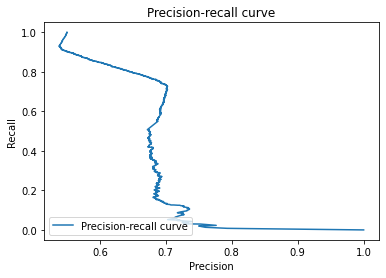

In [80]:
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(Test_label, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

### F measure

In [81]:
print("F measure: {:.4f}%".format(metrics.fbeta_score(Test_label, check, beta=0.5)*100))

F measure: 68.8296%


### F1 Score

In [83]:
f1score = metrics.f1_score(Test_label, check, average=None)
 
print("F1 Score\nClass 0: {}, Class 1: {}".format(f1score[0], f1score[1]))

F1 Score
Class 0: 0.6292181069958848, Class 1: 0.6747292418772562


### Roc Curves

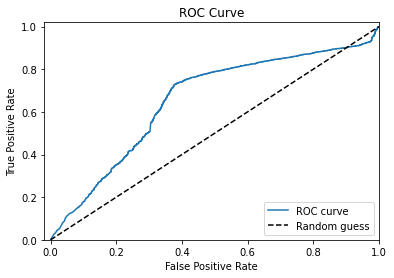

In [84]:
from sklearn.metrics import roc_curve
%matplotlib inline

fpr, tpr, thresholds = roc_curve(Test_label, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

#### ROC Accuracy Score

In [85]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Test_label, y_pred_prob)

0.6536384623810443

### Confusion matrix

In [88]:
confusion_matrix = metrics.confusion_matrix(Test_label, check)
print("Confusion Matrix\n{}".format(confusion_matrix))

Confusion Matrix
[[1529  810]
 [ 992 1869]]


true_positives = confusion_matrix[0][0]  
false_positives = confusion_matrix[0][1]  
true_negatives = confusion_matrix[1][1]  
false_negatives = confusion_matrix[1][0]  

### True Positive Rate

In [90]:
print("True Positive Rate: {}".format(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])))

True Positive Rate: 0.6536981616075246


### False Positive Rate

In [91]:
print("False Positive Rate: {}".format(confusion_matrix[0][1] / (confusion_matrix[0][1] + confusion_matrix[1][1])))

False Positive Rate: 0.3023516237402016


### Sensitivity

In [92]:
print("Sensitivity: {}".format(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])))

Sensitivity: 0.6536981616075246


### Specificity

In [93]:
print("Specificity: {}".format(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])))

Specificity: 0.6532680880810905
